<a href="https://colab.research.google.com/github/AngelSusanVino/Bharat-Intern---Business-Analytics/blob/main/Success_of_an_upcoming_movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [3]:
# Load the dataset
data = pd.read_csv('movie_success_rate.csv')

In [4]:
# Display basic information about the dataset
print(data.head())

   Rank                    Title                     Genre  \
0   1.0  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1   2.0               Prometheus  Adventure,Mystery,Sci-Fi   
2   3.0                    Split           Horror,Thriller   
3   4.0                     Sing   Animation,Comedy,Family   
4   5.0            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors    Year  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014.0   
1  Noomi Rapace, Logan Marshal

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    float64
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                838 non-null    float64
 7   Runtime (Minutes)   838 non-null    float64
 8   Rating              839 non-null    float64
 9   Votes               839 non-null    float64
 10  Revenue (Millions)  839 non-null    float64
 11  Metascore           838 non-null    float64
 12  Action              838 non-null    float64
 13  Adventure           838 non-null    float64
 14  Aniimation          838 non-null    float64
 15  Biography           838 non-null    float64
 16  Comedy  

**Preprocessing**

In [11]:
# Fill missing values in 'Rating' column with the mean
data['Rating'].fillna(data['Rating'].mean(), inplace=True)

# Select features and target variable
features = ['Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore',
            'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy', 'Crime', 'Drama',
            'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
            'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']

target = 'Success'

In [12]:
X = data[features]
y = data[target]

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print(y_train.isnull().sum())

1


In [19]:
# Drop rows with missing target values
missing_target_indices = y_train[y_train.isnull()].index
X_train = X_train.drop(index=missing_target_indices)
y_train = y_train.drop(index=missing_target_indices)

In [20]:
# Train a Logistic Regression classifier
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [21]:
# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Make predictions on the test set for both models
logreg_y_pred = logreg_model.predict(X_test)
rf_y_pred = rf_model.predict(X_test)

In [23]:
# Evaluate Logistic Regression model
logreg_accuracy = accuracy_score(y_test, logreg_y_pred)
logreg_classification_report = classification_report(y_test, logreg_y_pred)

In [24]:
# Evaluate Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_classification_report = classification_report(y_test, rf_y_pred)

In [25]:
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

Logistic Regression Accuracy: 0.9285714285714286
Random Forest Accuracy: 0.9940476190476191


In [26]:
print("Logistic Regression Classification Report:\n", logreg_classification_report)
print("Random Forest Classification Report:\n", rf_classification_report)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       137
         1.0       0.83      0.77      0.80        31

    accuracy                           0.93       168
   macro avg       0.89      0.87      0.88       168
weighted avg       0.93      0.93      0.93       168

Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       137
         1.0       1.00      0.97      0.98        31

    accuracy                           0.99       168
   macro avg       1.00      0.98      0.99       168
weighted avg       0.99      0.99      0.99       168



In [27]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


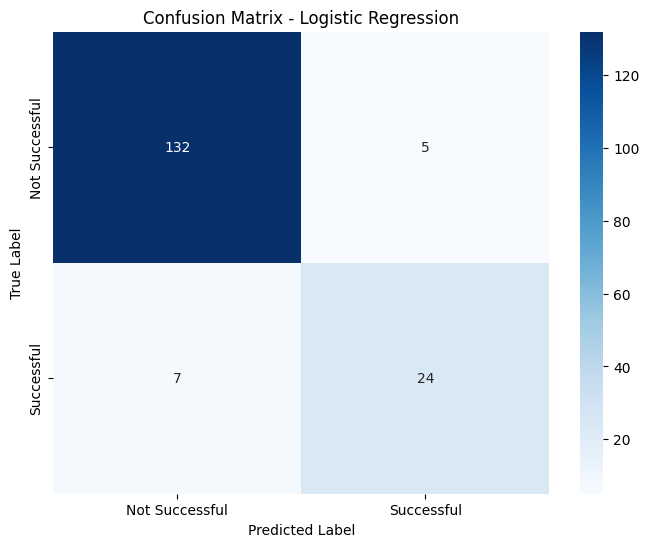

In [28]:
# Plot Confusion Matrix for Logistic Regression
logreg_conf_matrix = confusion_matrix(y_test, logreg_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(logreg_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Successful', 'Successful'], yticklabels=['Not Successful', 'Successful'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

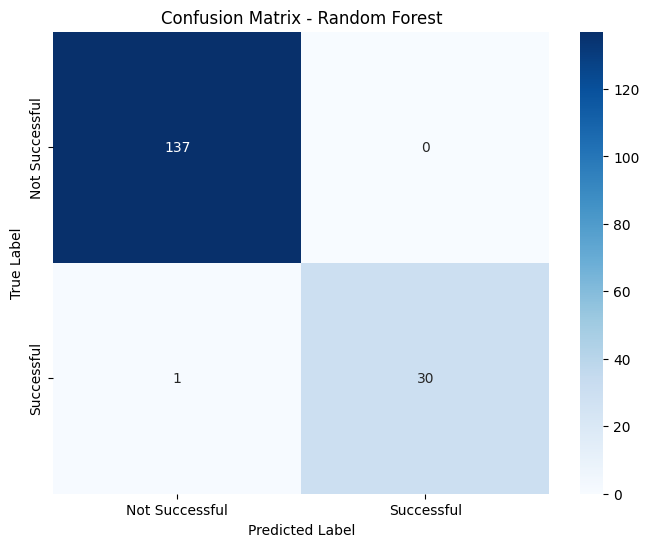

In [29]:

# Plot Confusion Matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Successful', 'Successful'], yticklabels=['Not Successful', 'Successful'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

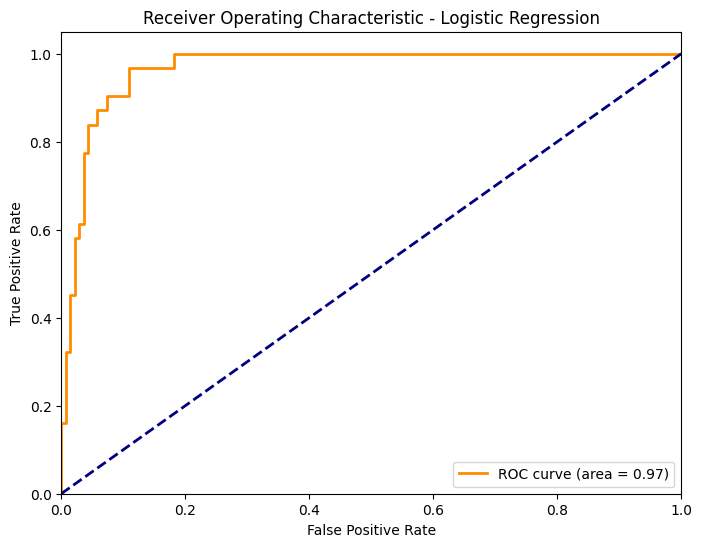

In [30]:
# Plot ROC Curve for Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_model.predict_proba(X_test)[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_logreg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

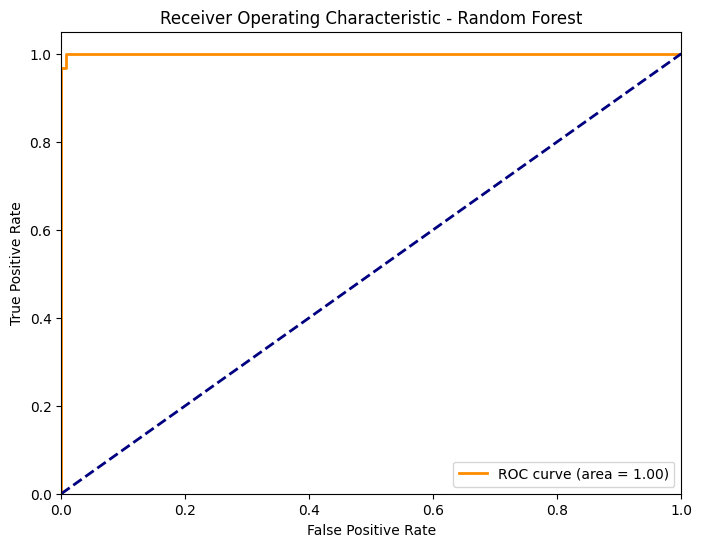

In [31]:
# Plot ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc='lower right')
plt.show()